In [1]:
import pandas as pd
from pandas.plotting import bootstrap_plot

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
'''
Выбран один регион (добавить возможность, чтобы пользователь мог выбирать)
В идеале было бы вывести графики сразу для всех регионов красиво :))

Если не получится добавить кнопку выбора региона то построить графики по groupby "Округ" - тогда построятся графики по всем округам
'''

'\nВыбран один регион (добавить возможность, чтобы пользователь мог выбирать)\nВ идеале было бы вывести графики сразу для всех регионов красиво :))\n\nЕсли не получится добавить кнопку выбора региона то построить графики по groupby "Округ" - тогда построятся графики по всем округам\n'

In [3]:
xls = pd.ExcelFile('Форма М1 2021.xlsx')

In [4]:
# Открыть листы Р1, Р2, Р3, Р4, Р5, Р6, Р7 и сохранить их в виде датафрейма с названиями r1, r2 и тд
# Открыть листы Раздел 1, Раздел 2 и тд и сохранить их в датафреймы с названиями razdel_1, razdel_2 и тд
data_numbers = [1, 2, 3, 4, 5, 6, 7]
for i in data_numbers:
    globals()['r'+str(i)] = pd.read_excel(xls, f'Р{i}')
    try:
        globals()['razdel_'+str(i)] = pd.read_excel(xls, f'Раздел {i}')
    except:
        globals()['razdel_'+str(i)] = pd.read_excel(xls, f'Раздел{i}')

In [5]:
# Открыть листы Р2-4 и статистика по годам
r4_2 = pd.read_excel(xls, 'Р4-2')
statistics_by_years = pd.read_excel(xls, 'статистика по годам')

In [6]:
r1.head()

,Регион,Округ,Год,Направления реализации государственной молодeжной политики,№ строки,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному",Unnamed: 11,Unnamed: 12
0,Алтайский край,СФО,2021,Вовлечение молодeжи в инновационную деятельнос...,1,7176890.0,123085.0,4.0,35485.0,3845.0,44.0,NaN,NaN
1,Алтайский край,СФО,2021,биомедицина,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Алтайский край,СФО,2021,промышленные технологии\n (нанотехн...,3,0.0,0.0,0.0,0.0,10.0,0.0,NaN,NaN
3,Алтайский край,СФО,2021,аэрокосмос,4,0.0,0.0,0.0,0.0,28.0,1.0,NaN,NaN
4,Алтайский край,СФО,2021,сельское хозяйство,5,0.0,1000.0,0.0,0.0,247.0,0.0,NaN,NaN


In [7]:
r1 = r1.iloc[:, :-2]
r1

,Регион,Округ,Год,Направления реализации государственной молодeжной политики,№ строки,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному"
0,Алтайский край,СФО,2021,Вовлечение молодeжи в инновационную деятельнос...,1,7176890.0,123085.0,4.0,35485.0,3845.0,44.0
1,Алтайский край,СФО,2021,биомедицина,2,0.0,0.0,0.0,0.0,0.0,0.0
2,Алтайский край,СФО,2021,промышленные технологии\n (нанотехн...,3,0.0,0.0,0.0,0.0,10.0,0.0
3,Алтайский край,СФО,2021,аэрокосмос,4,0.0,0.0,0.0,0.0,28.0,1.0
4,Алтайский край,СФО,2021,сельское хозяйство,5,0.0,1000.0,0.0,0.0,247.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2290,Ярославская область,ЦФО,2021,другие,23,28280275.0,4578284.0,NaN,NaN,211044.0,82.0
2291,Ярославская область,ЦФО,2021,"Формирование российской идентичности, единства...",24,445253.0,1228847.0,NaN,NaN,33576.0,71.0
2292,Ярославская область,ЦФО,2021,Вовлечение молодeжи в волонтeрскую деятельность,25,6642494.0,3990072.0,13.0,1000000.0,179481.0,225.0
2293,Ярославская область,ЦФО,2021,Вовлечение молодeжи в здоровый образ жизни и з...,26,3774146.0,3196862.0,NaN,NaN,58083.0,117.0


In [8]:
grouped_r1_region = pd.DataFrame(r1.groupby('Регион')['Кол-во грантов'].sum())
grouped_r1_region

,Кол-во грантов
Регион,
Алтайский край,70.0
Амурская область,19.0
Архангельская область,240.0
Астраханская область,30.0
Белгородская область,66.0
...,...
Чеченская Республика,0.0
Чувашская Республика,29.0
Чукотский автономный округ,29.0


In [9]:
whole_sum = r1['Кол-во грантов'].sum()

In [10]:
grouped_r1_region['whole_sum'] = whole_sum
grouped_r1_region

,Кол-во грантов,whole_sum
Регион,,
Алтайский край,70.0,14229.0
Амурская область,19.0,14229.0
Архангельская область,240.0,14229.0
Астраханская область,30.0,14229.0
Белгородская область,66.0,14229.0
...,...,...
Чеченская Республика,0.0,14229.0
Чувашская Республика,29.0,14229.0
Чукотский автономный округ,29.0,14229.0


In [11]:
grouped_r1_region['доля грантов по стране'] = grouped_r1_region['Кол-во грантов'] / grouped_r1_region['whole_sum'] * 100

In [12]:
altay = grouped_r1_region[grouped_r1_region.index=='Алтайский край']
altay['доля грантов по стране']

Регион
Алтайский край    0.491953
Name: доля грантов по стране, dtype: float64

In [13]:
r2.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во структур, ед","Всего кол-во сотрудников, чел",Всего с профильным образованием,"Всего объeм финансирования, руб",Расходы на мероприятия,Расходы на адм функции,Расходы на ремонт
0,Алтайский край,СФО,2021,"Региональные структуры по работе с молодeжью, ...",28,3.0,79.0,1.0,121243602,68186270.0,52268310.0,789022.0
1,Алтайский край,СФО,2021,региональный орган\n исполнительной...,29,1.0,28.0,0.0,34404000,7000000.0,27404000.0,0.0
2,Алтайский край,СФО,2021,бюджетные\n учреждения,30,2.0,51.0,1.0,86839602,61186270.0,24864310.0,789022.0
3,Алтайский край,СФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,80.0,127.0,33.0,11474299,5817581.0,5302718.0,354000.0
4,Алтайский край,СФО,2021,муниципальные\n органы\n испол...,32,69.0,92.0,19.0,10204299,4903131.0,5141168.0,160000.0


In [14]:
# Добавить столбцы доли расходов в % 
r2['Доля расходов на мер-я, %'] = r2['Расходы на мероприятия'] / r2['Всего объeм финансирования, руб'] * 100
r2.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во структур, ед","Всего кол-во сотрудников, чел",Всего с профильным образованием,"Всего объeм финансирования, руб",Расходы на мероприятия,Расходы на адм функции,Расходы на ремонт,"Доля расходов на мер-я, %"
0,Алтайский край,СФО,2021,"Региональные структуры по работе с молодeжью, ...",28,3.0,79.0,1.0,121243602,68186270.0,52268310.0,789022.0,56.239067
1,Алтайский край,СФО,2021,региональный орган\n исполнительной...,29,1.0,28.0,0.0,34404000,7000000.0,27404000.0,0.0,20.346471
2,Алтайский край,СФО,2021,бюджетные\n учреждения,30,2.0,51.0,1.0,86839602,61186270.0,24864310.0,789022.0,70.458948
3,Алтайский край,СФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,80.0,127.0,33.0,11474299,5817581.0,5302718.0,354000.0,50.700971
4,Алтайский край,СФО,2021,муниципальные\n органы\n испол...,32,69.0,92.0,19.0,10204299,4903131.0,5141168.0,160000.0,48.049660


In [15]:
# удалить из r2  строки с маленькой буквы
r2['Заглавная'] = r2['Наименование'].str.count(r'[А-Я]')

In [16]:
r2 = r2[r2['Заглавная']==1]
r2.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во структур, ед","Всего кол-во сотрудников, чел",Всего с профильным образованием,"Всего объeм финансирования, руб",Расходы на мероприятия,Расходы на адм функции,Расходы на ремонт,"Доля расходов на мер-я, %",Заглавная
0,Алтайский край,СФО,2021,"Региональные структуры по работе с молодeжью, ...",28,3.0,79.0,1.0,121243602,68186270.0,52268310.0,789022.0,56.239067,1
3,Алтайский край,СФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,80.0,127.0,33.0,11474299,5817581.0,5302718.0,354000.0,50.700971,1
6,Амурская область,ДФО,2021,"Региональные структуры по работе с молодeжью, ...",28,1.0,44.0,0.0,43890792,13854300.0,30036492.0,0.0,31.565391,1
9,Амурская область,ДФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,34.0,77.0,5.0,50063687,9295387.0,27756083.0,13012217.0,18.567124,1
12,Архангельская область,СЗФО,2021,"Региональные структуры по работе с молодeжью, ...",28,5.0,126.0,44.0,477180826,233793800.0,82614026.0,160773000.0,48.994802,1


In [17]:
r2['Регион/муниц структуры'] = r2['Наименование'].str.contains('Региональные').astype(int)
r2.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во структур, ед","Всего кол-во сотрудников, чел",Всего с профильным образованием,"Всего объeм финансирования, руб",Расходы на мероприятия,Расходы на адм функции,Расходы на ремонт,"Доля расходов на мер-я, %",Заглавная,Регион/муниц структуры
0,Алтайский край,СФО,2021,"Региональные структуры по работе с молодeжью, ...",28,3.0,79.0,1.0,121243602,68186270.0,52268310.0,789022.0,56.239067,1,1
3,Алтайский край,СФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,80.0,127.0,33.0,11474299,5817581.0,5302718.0,354000.0,50.700971,1,0
6,Амурская область,ДФО,2021,"Региональные структуры по работе с молодeжью, ...",28,1.0,44.0,0.0,43890792,13854300.0,30036492.0,0.0,31.565391,1,1
9,Амурская область,ДФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,34.0,77.0,5.0,50063687,9295387.0,27756083.0,13012217.0,18.567124,1,0
12,Архангельская область,СЗФО,2021,"Региональные структуры по работе с молодeжью, ...",28,5.0,126.0,44.0,477180826,233793800.0,82614026.0,160773000.0,48.994802,1,1


In [18]:
r2['Регион/муниц структуры'][r2['Регион/муниц структуры']==1] = 'Региональные'
r2['Регион/муниц структуры'][r2['Регион/муниц структуры']==0] = 'Муниципальные'
r2.index = r2['Регион/муниц структуры']
r2.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во структур, ед","Всего кол-во сотрудников, чел",Всего с профильным образованием,"Всего объeм финансирования, руб",Расходы на мероприятия,Расходы на адм функции,Расходы на ремонт,"Доля расходов на мер-я, %",Заглавная,Регион/муниц структуры
Регион/муниц структуры,,,,,,,,,,,,,,,
Региональные,Алтайский край,СФО,2021,"Региональные структуры по работе с молодeжью, ...",28,3.0,79.0,1.0,121243602,68186270.0,52268310.0,789022.0,56.239067,1,Региональные
Муниципальные,Алтайский край,СФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,80.0,127.0,33.0,11474299,5817581.0,5302718.0,354000.0,50.700971,1,Муниципальные
Региональные,Амурская область,ДФО,2021,"Региональные структуры по работе с молодeжью, ...",28,1.0,44.0,0.0,43890792,13854300.0,30036492.0,0.0,31.565391,1,Региональные
Муниципальные,Амурская область,ДФО,2021,"Муниципальные структуры по работе с молодeжью,...",31,34.0,77.0,5.0,50063687,9295387.0,27756083.0,13012217.0,18.567124,1,Муниципальные
Региональные,Архангельская область,СЗФО,2021,"Региональные структуры по работе с молодeжью, ...",28,5.0,126.0,44.0,477180826,233793800.0,82614026.0,160773000.0,48.994802,1,Региональные


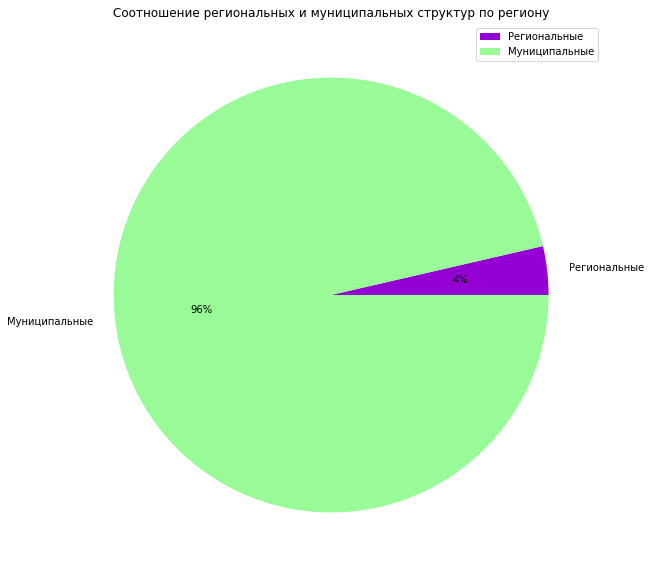

In [50]:
# численность региональных структур и муниципальных (Кол-во структур, ед) по одному региону
# убрать подписи возле pie - региональные и муниципальные
r2[(r2['Регион']=='Алтайский край')]['Кол-во структур, ед'].plot.pie(autopct='%1.0f%%',
                                                               figsize=(10,10),
                                                               legend=True,
                                                               colors=['darkviolet', 'palegreen'],
                                                               title='Соотношение региональных и муниципальных структур по региону');

plt.axis('off');

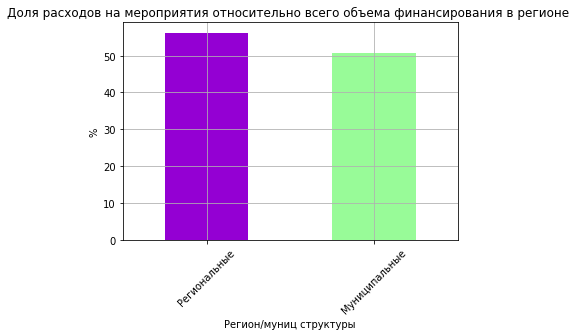

In [51]:
my_labels=r2['Наименование']
r2[r2['Регион']=='Алтайский край']['Доля расходов на мер-я, %'].plot.bar(grid=True,
    title='Доля расходов на мероприятия относительно всего объема финансирования в регионе ',
    color=['darkviolet', 'palegreen'], rot=45,
    ylabel='%');

In [21]:
r3.head()

,Регион,Округ,Год,Показатель,№ строки,Единица измерения,Значение
0,Республика Адыгея,ЮФО,2021,"Численость уникальных пользователей, посетивши...",34,чел,16087.0
1,Республика Адыгея,ЮФО,2021,Количество просмотров официального сайта орган...,35,ед,27314.0
2,Республика Адыгея,ЮФО,2021,Финансирование информационного освещения реали...,36,руб,NaN
3,Республика Адыгея,ЮФО,2021,"Количество статей, опубликованных в главном пр...",37,ед,2.0
4,Республика Адыгея,ЮФО,2021,Количество упоминаний реагионального органа ис...,38,ед,60.0


In [22]:
r3[r3['Единица измерения']=='чел']['Показатель'].unique()

array(['Численость уникальных пользователей, посетивших официальный сайт регионального органа исполнительной власти, реализующего государственную молодeжную политику',
       'Численность подписчиков / участников сообществ регионального органа исполнительной власти, реализующего государственную молодeжную политику в социальных сетях'],
      dtype=object)

In [23]:
r3[r3['Единица измерения']=='ед']['Показатель'].unique()

array(['Количество просмотров официального сайта органа исполнительной власти, реализующего государственную молодeжную политику',
       'Количество статей, опубликованных в главном правительственном печатном издании субъекта Российской Федерации о реализации государственной молодeжной политики в регионе',
       'Количество упоминаний реагионального органа исполнительной власти, реализующего государственную молодeжную политику, в том числе:',
       '      в печатных средствах массовой информации',
       '      в интернет-СМИ', '      ТВ-сюжетов',
       'Количество статей, опубликованных региональным органом исполнительной власти, реализующим государственную молодeжную политику, направленных пресс-службой федерального органа исполнительной власти, осуществляющего функции по оказанию государственных услуг и управлению государственным имуществом в сфере государственной молодeжной политики',
       'Количество новостей, опубликованных от региона на официальном сайте федерального органа

In [24]:
r3[r3['Единица измерения']=='руб']['Показатель'].unique()

array(['Финансирование информационного освещения реализации государственной молодeжной политики'],
      dtype=object)

In [25]:
r3['Показатель'][r3['Показатель']=='Численность подписчиков / участников сообществ регионального органа исполнительной власти, реализующего государственную молодeжную политику в социальных сетях'] = 'Численность подписчиков'
r3['Показатель'][r3['Показатель']=='Количество публикаций в сообществах регионального органа исполнительной власти, реализующего государственную молодeжную политику в социальных сетях'] = 'Кол-во публикаций в сообществах рег. органов'
r3['Показатель'][r3['Показатель']=='Финансирование информационного освещения реализации государственной молодeжной политики'] = 'Финансирование инф. освещения'

r3.head() 

,Регион,Округ,Год,Показатель,№ строки,Единица измерения,Значение
0,Республика Адыгея,ЮФО,2021,"Численость уникальных пользователей, посетивши...",34,чел,16087.0
1,Республика Адыгея,ЮФО,2021,Количество просмотров официального сайта орган...,35,ед,27314.0
2,Республика Адыгея,ЮФО,2021,Финансирование инф. освещения,36,руб,NaN
3,Республика Адыгея,ЮФО,2021,"Количество статей, опубликованных в главном пр...",37,ед,2.0
4,Республика Адыгея,ЮФО,2021,Количество упоминаний реагионального органа ис...,38,ед,60.0


In [26]:
r3.fillna(0, inplace=True)
# выбор региона
region_r3 = r3[r3['Регион']=='Республика Адыгея']
conditions = (r3['Показатель']=='Численность подписчиков') | (r3['Показатель']=='Кол-во публикаций в сообществах рег. органов') | (r3['Показатель']=='Финансирование инф. освещения')
region_r3 = r3[conditions]
region_r3.groupby('Показатель')['Значение'].sum()

Показатель
Кол-во публикаций в сообществах рег. органов       363282.0
Финансирование инф. освещения                   125207488.0
Численность подписчиков                           3563043.0
Name: Значение, dtype: float64

In [27]:
r4 = r4.iloc[:, :-3]
r4

,Регион,Округ,Год,Наименование,№ строки,"Кол-во рег. объединений, ед","Кол-во мест. объединений, ед","Число членов рег. объединений, чел","Число членов мест. объединений, чел","Число уч-в мер-й рег. объединений, чел","Число уч-в мер-й мест. объединений, чел","Объeм фин.поддержки рег. объединений, руб","Объeм фин.поддержки мест. объединений, руб"
0,Республика Адыгея,ЮФО,2021,"Общественные объединения, включенные в реестр ...",46,NaN,0.0,5368.0,NaN,NaN,NaN,0.0,NaN
1,Республика Адыгея,ЮФО,2021,"Объединения, включенные в перечень партнеров о...",47,4.0,0.0,710.0,0.0,32193.0,0.0,0.0,0.0
2,Республика Адыгея,ЮФО,2021,Политические молодeжные общественные объединения,48,1.0,0.0,32.0,NaN,0.0,0.0,0.0,0.0
3,Республика Адыгея,ЮФО,2021,Молодeжные патрули / добровольные молодeжные д...,49,2.0,NaN,70.0,NaN,NaN,NaN,0.0,NaN
4,Республика Алтай,СФО,2021,"Общественные объединения, включенные в реестр ...",46,21.0,26.0,4587.0,184.0,38500.0,592.0,1515621.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Республика Северная Осетия - Алания,СКФО,2021,Молодeжные патрули / добровольные молодeжные д...,49,7.0,NaN,125.0,NaN,NaN,NaN,0.0,NaN
336,Карачаево-Черкесская Республика,СКФО,2021,"Общественные объединения, включенные в реестр ...",46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,Карачаево-Черкесская Республика,СКФО,2021,"Объединения, включенные в перечень партнеров о...",47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,Карачаево-Черкесская Республика,СКФО,2021,Политические молодeжные общественные объединения,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
r4.fillna(0, inplace=True)
r4['Общее кол-во членов объединений'] = r4['Число членов рег. объединений, чел'] + r4['Число членов мест. объединений, чел']
r4['Сумма фин поддержки'] = r4['Объeм фин.поддержки рег. объединений, руб'] + r4['Объeм фин.поддержки мест. объединений, руб']

In [29]:
r4.head()

,Регион,Округ,Год,Наименование,№ строки,"Кол-во рег. объединений, ед","Кол-во мест. объединений, ед","Число членов рег. объединений, чел","Число членов мест. объединений, чел","Число уч-в мер-й рег. объединений, чел","Число уч-в мер-й мест. объединений, чел","Объeм фин.поддержки рег. объединений, руб","Объeм фин.поддержки мест. объединений, руб",Общее кол-во членов объединений,Сумма фин поддержки
0,Республика Адыгея,ЮФО,2021,"Общественные объединения, включенные в реестр ...",46,0.0,0.0,5368.0,0.0,0.0,0.0,0.0,0.0,5368.0,0.0
1,Республика Адыгея,ЮФО,2021,"Объединения, включенные в перечень партнеров о...",47,4.0,0.0,710.0,0.0,32193.0,0.0,0.0,0.0,710.0,0.0
2,Республика Адыгея,ЮФО,2021,Политические молодeжные общественные объединения,48,1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0
3,Республика Адыгея,ЮФО,2021,Молодeжные патрули / добровольные молодeжные д...,49,2.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0
4,Республика Алтай,СФО,2021,"Общественные объединения, включенные в реестр ...",46,21.0,26.0,4587.0,184.0,38500.0,592.0,1515621.0,100000.0,4771.0,1615621.0


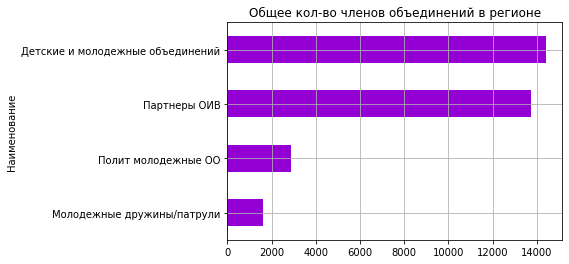

<AxesSubplot:title={'center':'Сумма финансовой поддержки региона'}, ylabel='Наименование'>

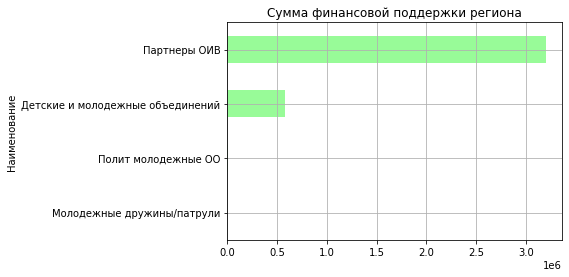

In [59]:
region_r4 = r4[r4['Регион']=='Алтайский край']
region_r4['Наименование'][region_r4['Наименование']=='Объединения, включенные в перечень партнеров органа исполнительной власти, реализующего государственную молодeжную политику / работающего с молодeжью (исключая ситуации, включенные в реестр согласно Федеральному закону № 98-ФЗ)'] = 'Партнеры ОИВ'
region_r4['Наименование'][region_r4['Наименование']=='Политические молодeжные общественные объединения'] = 'Полит молодежные ОО'
region_r4['Наименование'][region_r4['Наименование']=='Молодeжные патрули / добровольные молодeжные дружины'] = 'Молодежные дружины/патрули'
region_r4['Наименование'][region_r4['Наименование']=='Общественные объединения, включенные в реестр детских и молодeжных объединений, пользующихся государственной поддержкой'] = 'Детские и молодeжные объединений'
        
region_r4.groupby('Наименование')['Общее кол-во членов объединений'].sum().sort_values().plot.barh(color='darkviolet', grid=True,
                                                                               title='Общее кол-во членов объединений в регионе')
plt.show()
region_r4.groupby('Наименование')['Сумма фин поддержки'].sum().sort_values().plot.barh(color='palegreen', grid=True,
                                                                     title='Сумма финансовой поддержки региона')



In [31]:
r5.head()

,Регион,Округ,Год,Наименование,№ строки,"Количество органов самоуправления, ед",Число членов органов при ОИВ,Число членов органов при ОПВ,Число членов ИК,Объем финанс-я ОМСУ,Число членов УССУ,Число уч-в мер-й УССУ,Объем финансирования УССУ
0,Республика Адыгея,ЮФО,2021,Региональный уровень,51,NaN,28.0,50.0,0.0,100000.0,NaN,NaN,NaN
1,Республика Адыгея,ЮФО,2021,Муниципальный уровень,52,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Республика Адыгея,ЮФО,2021,Ученическое самоуправление,53,137.0,NaN,NaN,NaN,NaN,18021.0,18021.0,NaN
3,Республика Адыгея,ЮФО,2021,Студенческое самоуправление,54,10.0,NaN,NaN,NaN,NaN,170.0,6560.0,0.0
4,Республика Алтай,СФО,2021,Региональный уровень,51,1.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN


In [32]:
r5.fillna(0, inplace=True)

In [112]:
region_r5 = r5[r5['Регион']=='Республика Алтай']

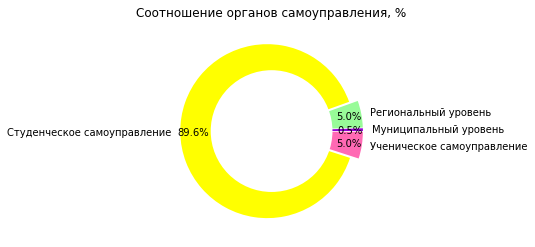

In [113]:
explode = (0.05, 0.05, 0.05, 0.05)


plt.pie(region_r5['Количество органов самоуправления, ед'], colors=['darkviolet', 'palegreen', 
                                                              'yellow', 'hotpink'], 
        autopct='%1.1f%%', pctdistance=0.85, explode=explode, labels=['Муниципальный уровень',
                                                                      'Региональный уровень',
                                                                      'Студенческое самоуправление',
                                                                      'Ученическое самоуправление'])
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Соотношение органов самоуправления, %')

plt.axis('off');

In [33]:
r6.head()

,Регион,Округ,Год,Наименование,№ строки,"Количество форумов соответствующего уровня, прошедших на территории субъекта Рос","Численность участников форумов соответствующего уровня, чел",Объeм рег. финансирования (в том числе посредством финансирования транспортных и,Объeм мун. финансирования (в том числе посредством финансирования транспортных и
0,Республика Адыгея,ЮФО,2021,Всероссийские молодeжные форумы,55,NaN,0.0,54000.0,0.0
1,Республика Адыгея,ЮФО,2021,Окружные молодeжные форумы,56,2.0,300.0,0.0,0.0
2,Республика Адыгея,ЮФО,2021,Региональные и межрегиональные молодeжные форумы,57,6.0,900.0,343460.0,0.0
3,Республика Адыгея,ЮФО,2021,Муниципальные и межмуниципальные молодeжные фо...,58,1.0,130.0,0.0,40000.0
4,Республика Адыгея,ЮФО,2021,Всего,59,9.0,1330.0,397460.0,40000.0


In [34]:
r6['всего включ'] = r6['Наименование'].str.contains('Всего').astype(int)
r6.head()

,Регион,Округ,Год,Наименование,№ строки,"Количество форумов соответствующего уровня, прошедших на территории субъекта Рос","Численность участников форумов соответствующего уровня, чел",Объeм рег. финансирования (в том числе посредством финансирования транспортных и,Объeм мун. финансирования (в том числе посредством финансирования транспортных и,всего включ
0,Республика Адыгея,ЮФО,2021,Всероссийские молодeжные форумы,55,NaN,0.0,54000.0,0.0,0
1,Республика Адыгея,ЮФО,2021,Окружные молодeжные форумы,56,2.0,300.0,0.0,0.0,0
2,Республика Адыгея,ЮФО,2021,Региональные и межрегиональные молодeжные форумы,57,6.0,900.0,343460.0,0.0,0
3,Республика Адыгея,ЮФО,2021,Муниципальные и межмуниципальные молодeжные фо...,58,1.0,130.0,0.0,40000.0,0
4,Республика Адыгея,ЮФО,2021,Всего,59,9.0,1330.0,397460.0,40000.0,1


In [35]:
r6 = r6[r6['всего включ']!=1]

In [69]:
r6['Наименование'][r6['Наименование']=='Всероссийские молодeжные форумы'] = 'Всероссийские'
r6['Наименование'][r6['Наименование']=='Окружные молодeжные форумы'] = 'Окружные'
r6['Наименование'][r6['Наименование']=='Региональные и межрегиональные молодeжные форумы'] = 'Региональные и межрегиональные '
r6['Наименование'][r6['Наименование']=='Муниципальные и межмуниципальные молодeжные форумы'] = 'Муниципальные и межмуниципальные'

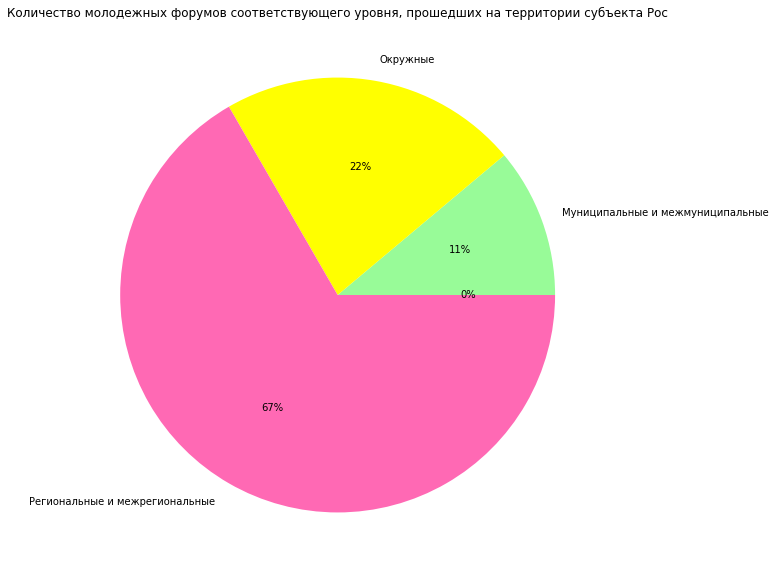

In [70]:
# выберем регион
region_r6 = r6[r6['Регион']=='Республика Адыгея']
region_r6.groupby('Наименование')['Количество форумов соответствующего уровня, прошедших на территории субъекта Рос'].sum().plot.pie(autopct='%1.0f%%',
                                                                                                                        title='Количество молодежных форумов соответствующего уровня, прошедших на территории субъекта Рос',
                                                                                                                        figsize=(10, 10),
                                                                                                                        colors=['darkviolet', 'palegreen', 'yellow', 'hotpink'])

plt.axis('off');

In [62]:
r7.head()

,Регион,Округ,Год,Показатель,№ строки,Единица измерения,Значение
0,Республика Адыгея,ЮФО,2021,Общее количество региональных ресурсных центро...,60.0,ед,1.0
1,Республика Адыгея,ЮФО,2021,Количество государственных учреждений на терри...,61.0,ед,192.0
2,Республика Адыгея,ЮФО,2021,образование,62.0,ед,150.0
3,Республика Адыгея,ЮФО,2021,здравохранение,63.0,ед,13.0
4,Республика Адыгея,ЮФО,2021,социальная защита и социальное обслуживание,64.0,ед,9.0


In [82]:
people_r7 = r7[r7['Единица измерения']=='чел']
young = people_r7[(people_r7['Показатель'].str.contains('от 7 до 13')) | 
          (people_r7['Показатель'].str.contains('от 14 до 30'))]
adults = people_r7[(people_r7['Показатель'].str.contains('от 31 до 54')) | 
          (people_r7['Показатель'].str.contains('от 55'))]

# grouped_young = pd.DataFrame(young.groupby('Округ')['Значение'].sum())
# grouped_adults = pd.DataFrame(adults.groupby('Округ')['Значение'].sum())


# выбрать регион
grouped_young = young[young['Регион']=='Республика Адыгея']
grouped_adults = adults[adults['Регион']=='Республика Адыгея']

In [84]:
grouped_young.rename({'Значение':'Кол-во молодых'}, axis=1, inplace=True)
grouped_adults.rename({'Значение':'Кол-во взрослых'}, axis=1, inplace=True)

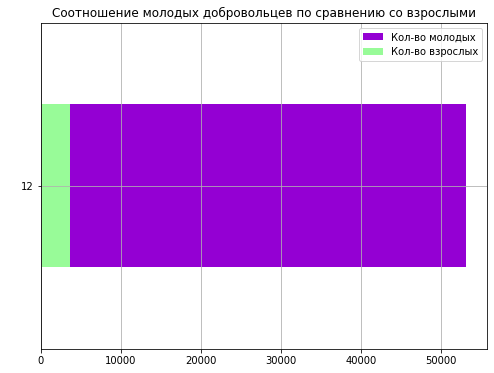

In [91]:
ax = grouped_young.plot.barh(y='Кол-во молодых', color='darkviolet', legend=True, figsize=(8, 6), grid=True,
                             xlabel=' ', ylabel='Количество')
grouped_adults.plot.barh(ax=ax, y='Кол-во взрослых', legend=True, grid=True, color='palegreen')
plt.title('Соотношение молодых добровольцев по сравнению со взрослыми');